### Component Separation Using Bayesian Methods



## Simple Test Case
Before we move on to any real data, let us take a step back and look at a couple ways to solve for parameters from a distribution. 

First let us draw 1000 samples from a Gaussian distribution and look at a histogram of the result. 

As a reminder, a Gaussian distribution for parameter $x$ with mean $\mu$ and standard deviation $\sigma$ is given by

\begin{equation}
p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}.
\end{equation}

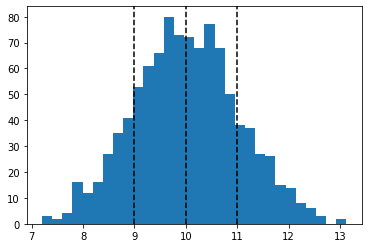

In [3]:
import numpy as np
import matplotlib.pyplot as plt

ndraws = 1000
mu     = 10.
sigma  = 1.

data = np.zeros(ndraws)
for i in range(ndraws):
    data[i] = np.random.normal(mu,sigma)

plt.hist(data,bins=30)
plt.axvline(mu,color='k',linestyle='--')
plt.axvline(mu-sigma,color='k',linestyle='--')
plt.axvline(mu+sigma,color='k',linestyle='--')
plt.show()

Now let us suppose we only have the `data` vector defined above, and want to find the mean value of that data. How do we go about that?

The first step is always to craft a data model. Let us switch to an observational standpoint. We start by assuming that the true value of the data $\mu'$ is a single value who's obserbed value has been obscured by some underlying Gaussian noise, i.e. $x = \mu' + n$ where $x$ is the data, and $n$ is some Gaussian noise. We will generalize this to the following equation, which ought to be baked into your memory

\begin{equation}
d = s + n
\end{equation}

where $d$ is the observed data, $s$ is the true underlying signal, and $n$ is again a noise term. This formalism is the basis of our component separation methods and will be expanded upon further. Down the road.

# Maximum-Likelihood Solution

Now that we have a simple data model, how does one go about actually determining the true underlying signal $s$? A good starting point is by finding what is called the maximum-likelihood solution, using maximum likelihood estimation (MLE). A cursory Google search for maximum likelihood estimation will provide a mix of math heavy resources (like Wikipedia), and some practical examples (like towardsdatascience). 

Here we will stick with a Gaussian assumption, i.e. that the noise inherent in the data has a Gaussian form. 

For any observed point $x_i$, the probability of observing that data point, given the underlying mean ($\mu$) and standard deviation ($\sigma$) of the distribution is given by

$p(x_i|\mu,\,\sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}$,

and the probability of observing say 3 data points $x_1$, $x_2$, and $x_3$ is given by 

$p(x_1,x_2,x_3|\mu,\,\sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x_1-\mu)^2}{2\sigma^2}}\times\frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x_2-\mu)^2}{2\sigma^2}}\times\frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x_3-\mu)^2}{2\sigma^2}}$.

Let us take all of our observations into account and condense our probability expression (the likelihood) to be

\begin{equation}
p(\vec{x}|\mu,\,\sigma) = {\displaystyle \prod_{i=1}^{1000}}\frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}
\end{equation}

From our Calculus experience, we may note that a sure fire way to determine the maximum or minimum of a function is by taking its derivative. However we can tell by looking at the above equation that taking the derivative of this thing will be a cumbersome operation.

Those versed in MLE will be quick to point out that taking the natural logarithm of the above expression gives us something nice to work with!

To be explicit, finding the maximum likelihood solution involves finding $\mu$ where
   
\begin{equation}
\frac{\partial \ln (p(\vec{x}|\mu,\,\sigma))}{\partial \mu} = 0.
\end{equation}

Before we move on, let us touch on a couple final pieces of information which will be important for the future. First let's consider the equation we are solving here $p(\vec{x}|\mu,\,\sigma)$. This equation reads "probability of the data given the parameters $\mu$ and $\sigma$. Since we already know the data, and don't know the values of $\mu$ and $\sigma$ a priori, it appears that this equation itself isn't very useful. However, the <span style="background-color:yellow">likelihood</span> of having $\mu$ and $\sigma$ given some data $\vec{x}$ is defined as

\begin{equation}
L(\mu,\,\sigma|\vec{x}) = p(\vec{x}|\mu,\,\sigma).
\end{equation}

Though the equations are equal, they ask different questions. The left-hand side is concerned about the likelihood of the parameters given the data, while the right-hand side is asking about what the probability of observing the data is, given the parameters. Hence the phrasing *Maximum Likelihood Solution*.

Finally, as we will see often later on, let us clearly define the log-likelihood as

\begin{equation}
\mathcal{L}(\mu,\,\sigma|\vec{x}) = \ln\,p(\vec{x}|\mu,\,\sigma)
\end{equation}

Compiled with help from [towardsdatascience.com](https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1).

Task 1: 

- Derive an expression $\mathcal{L}(\mu,\,\sigma|\vec{x})$. Hold on to this result as we will come back to it later.

- Derive an expression for $\frac{\partial \mathcal{L}(\mu,\,\sigma|\vec{x})}{\partial \mu} = 0$.

- Given the above expression for $\frac{\partial \mathcal{L}(\mu,\,\sigma|\vec{x})}{\partial \mu}$, find an expression for the mean of the data.

- Create a function which takes in the data and a noise ($\sigma$) estimate and returns the log-likelihood as a function of the mean. Plot the result.

- Create a function which solves for the ML solution given the data, and compare your answer to the value of $\mu$ given in the first cell.

<div style="background-color:#e6f3ff; padding:10px; border-style:
solid;; border-color:#0084ff; border-width:1px">
Solution:

\begin{align}
\ln (p(\vec{x}|\mu,\,\sigma)) =& \ln{\displaystyle \prod_{i=1}^{1000}}\frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}\\
=& {\displaystyle \sum_{i=1}^{1000} \ln \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}}\\
=& \ln \frac{1}{\sqrt{2 \pi \sigma^2}} {\displaystyle \sum_{i=1}^{1000} \ln e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}}\\
=& \ln \frac{1}{\sqrt{2 \pi \sigma^2}} {\displaystyle \sum_{i=1}^{1000} {-\frac{(x_i-\mu)^2}{2\sigma^2}}}\\
=& \ln \frac{1}{\sqrt{2 \pi \sigma^2}} {\displaystyle \sum_{i=1}^{1000} {-\frac{(x_i^2-2\mu x_i+\mu^2)}{2\sigma^2}}}\\
\end{align}
    
This result is nice in itself as an expression of the log-likelihood $\mathcal{L}$ for a Gaussian distribution.

Then taking the partial derivative of the above with respect to the mean gives

\begin{align}
\frac{\partial \ln (p(\vec{x}|\mu,\,\sigma))}{\partial \mu} =& \frac{\partial}{\partial \mu} \ln \frac{1}{\sqrt{2 \pi \sigma^2}}{\displaystyle \sum_{i=1}^{1000} {-\frac{(x_i^2-2\mu x_i+\mu^2)}{2\sigma^2}}}\\
=& \frac{\partial}{\partial \mu} {\displaystyle \sum_{i=1}^{1000} {-\frac{(x_i^2-2\mu x_i+\mu^2)}{2\sigma^2}}}\\
=& -\frac{1}{2\sigma^2} {\displaystyle \sum_{i=1}^{1000}\frac{\partial}{\partial \mu}(x_i^2-2\mu x_i+\mu^2)}\\
=& -\frac{1}{2\sigma^2} {\displaystyle \sum_{i=1}^{1000}-2x_i+2\mu}\\
=& \frac{1}{\sigma^2} {\displaystyle \sum_{i=1}^{1000}x_i-\mu}\\
=& 0
\end{align}

This gives us a nice expression for the $\mu$,

\begin{equation}
\mu = {\displaystyle \frac{1}{1000}\sum_{i=1}^{1000} x_i},
\end{equation}
which should not be a surprising result as the estimate of the mean is just the average of all of the samples.
</div>

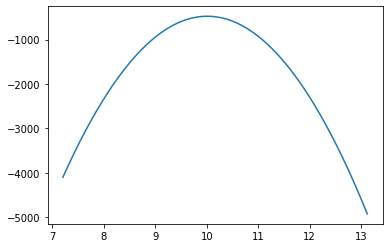

10.010798131827618


In [11]:
def return_log_likelihood(data,sigma):
    samples = np.shape(data)[0]
    
    # Make a grid of uniform possible mean values
    mu_grid = np.linspace(np.min(data),np.max(data),1000)
    
    # Initialize the lnL arary
    lnL = np.zeros(1000)
    
    # Calculate
    for i in range(1000):
        for j in range(samples):
            lnL[i] += np.log(1/(np.sqrt(2*np.pi*sigma**2)))*(data[j]-mu_grid[i])**2/(2*sigma**2)

    return mu_grid,lnL
    
# Get the values
x, lnL = return_log_likelihood(data,sigma)
# Plot
plt.plot(x,lnL)
plt.show()

def solve_for_ML(data,sigma):
    samples = np.shape(data)[0]
    
    # Very Fortran-y, slow method:
    amplitude = 0
    for i in range(samples):
        amplitude += data[i]
        
    amplitude = amplitude/samples
    
    return amplitude

print(solve_for_ML(data,sigma))

# Multi-frequency example

As we will see further on, determing the mean of an observable can be aided by (or in practice requires) the addition of multiple data points. As we move more towards a realistic example, we will say that we have observations at multiple frequencies. For a simple example, let's consider some observable which scales linearly with frequency. 

Let's create a new data set, where our observable has a mean value $a_{obs} = \mu$, and each observation frequency has its own noise characterisitic $n_{\nu}$.

When carrying out this multi-frequency analysis, we need to determine a reference frequency $\nu_{\rm ref}$, at which we evaluate the recovered amplitude $a_{obs}$.

Therefore, our new data model will be written as

$d_{\nu} = a_{obs}(\nu/\nu_{\rm ref}) + n_{\nu}$.

In [19]:
# New variables
nfreq  = 5
nus    = np.asarray([10.,20., 30.,40.,50.])
sigmas = np.asarray([1., 1.5, 1.25, 2., 0.75])

# Remake our data array
data   = np.empty((ndraws,nfreq))

# Reference frequency
nu_ref = 20.

def scaling(amplitude,frequency,reference):
   return amplitude*(frequency/reference)

for i in range(ndraws):
        for j in range(nfreq):
            data[i][j] = scaling(mu,nus[j],nu_ref)+np.random.normal(0.0,sigmas[j])


What does this data look like for us?

<ErrorbarContainer object of 3 artists>

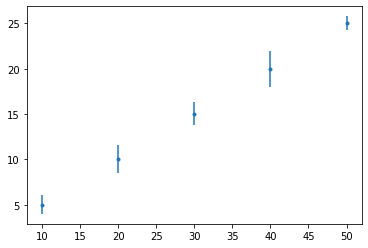

In [20]:
data_mean  = np.empty(nfreq)
data_error = np.empty(nfreq)
for j in range(nfreq):
    data_mean[j]  = np.mean(data.T[j])
    data_error[j] = np.std(data.T[j])
    
plt.errorbar(nus,data_mean,yerr=data_error,fmt='.')

Task 2:

- Generalize the return_log_likelihood function and plot $\mathcal{L}(a_{obs}|\boldsymbol d)$ as a function of $a_{obs}$.

- Generalize the solve_for_ML function to find the mean value of $a_{obs}$.


# Generalization

Up until now we have taken a very simple example, where we have a data vector containing samples, and we find the MLS. Before we move to drawing samples from noisy data, we will define some more general nomenclature. Our original data model looked something like

\begin{equation}
d = s + n.
\end{equation}

We then expanded the actual signal into an amplitude and a frequency scaling

\begin{equation}
s = a_{obs}(\nu/\nu_{\rm ref}).
\end{equation}

This expansion of the signal term can be generalized in the following way

\begin{equation}
s = \tens{T}a,
\end{equation}

where $\tens{T}$ is a matrix containing the scaling relation information, and $a$ is a vector corresponding to the amplitudes we are looking for.

# Draw from Gaussian Distribution

# Metropolis-Hastings Sampler

## Load in the Data

To begin let us load in our simulated sky maps.

We define our data model as:

$d_{\nu} = s_{\nu} + n_{\nu}$

In [ ]:
import healpy as hp

## Component Amplitude Sampling

Begging with t